In [2]:
import pandas as pd
import os
import regex as re
from datetime import datetime
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import os
from matplotlib.dates import DateFormatter
%matplotlib inline
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 13
mpl.rcParams["xtick.labelsize"] = 13
mpl.rcParams["ytick.labelsize"] = 13
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = "medium"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [62]:
def query_string_gen(file, words):
    l=[]

    with open(os.path.join(ROOT_DIR,"results",file), 'r') as file:
        lines = file.readlines()
    for line in lines:
        for word in words:
            if word in line:
                l.append(re.search(r'\d+', line).group())
    l = list(dict.fromkeys(l))

    string = ""
    for i,j in enumerate(l):
        if i==len(l)-1:
            string += f"Topic == {j}"
        else:
            string += f"Topic == {j} | "
    return string

def query_string_gen_two_lda(file, words):
    l=[]

    with open(os.path.join(ROOT_DIR,"results_two_lda","second",file), 'r') as file:
        lines = file.readlines()
    for line in lines:
        for word in words:
            if word in line:
                l.append(re.search(r'\d+', line).group())
    l = list(dict.fromkeys(l))

    string = ""
    for i,j in enumerate(l):
        if i==len(l)-1:
            string += f"Topic == {j}"
        else:
            string += f"Topic == {j} | "
    return string

# Bit of code to get most resonant news dates

In [ ]:
data = pd.read_csv(os.path.join(ROOT_DIR,"results_5","All_results.csv"))
data.head()

,Date,Source,URL,Title,Text,Comments,Novelty,Transience,Resonance,Topic
0,2022-11-21,Express,https://www.express.co.uk/news/world/1698975/U...,Ukraine LIVE: Zelensky's advisor rules out Rus...,An adviser to Ukrainian President Volodymyr Ze...,NaN,0.0,0.0,0.0,3
1,2022-11-21,Reuters,https://www.reuters.com/article/ukraine-crisis...,'Playing with fire' UN warns as team to inspec...,The head of the U.N. nuclear watchdog has warn...,NaN,0.0,0.0,0.0,2
2,2022-11-21,Reuters,https://www.reuters.com/article/russia-diesel-...,Europe rushes to fill up on Russian diesel bef...,European traders are rushing to fill tanks in ...,NaN,0.0,0.0,0.0,4
3,2022-11-21,DailyMail,https://www.dailymail.co.uk/news/article-11451...,'Russia is bombing us into the Stone Age. This...,"When the power is out, as it so often is, the ...",NaN,0.0,0.0,0.0,2
4,2022-11-21,Reuters,https://www.reuters.com/article/global-oil/oil...,Oil prices fall around $1 to near 2-month lows...,Oil prices dropped to near two-month lows on M...,NaN,0.0,0.0,0.0,4


In [ ]:
data = data.sort_values(by="Resonance",ascending=False)
data.head(50)

,Date,Source,URL,Title,Text,Comments,Novelty,Transience,Resonance,Topic
13973,2022-07-25,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Britain says 'inconclusive fighting' continues...,Inconclusive fighting has continued in both Do...,NaN,6.765362,3.298652,3.466710,2
13996,2022-07-25,DailyMail,https://www.dailymail.co.uk/news/article-11045...,Two of Putin’s top pilots are wiped out in HIM...,Two of Putin's best pilots have been killed by...,NaN,6.413396,2.997236,3.416161,2
67731,2020-01-14,Reuters,https://www.reuters.com/article/us-iran-crash-...,Person who posted video of missile striking Uk...,A person who posted a video online of a missil...,NaN,6.695063,3.345407,3.349656,2
67713,2020-01-14,Fox,https://www.foxnews.com/world/iran-ukraine-pla...,New Iran plane crash video shows 2 missiles hi...,"The plane, en route to the Ukrainian capital o...",NaN,5.992058,2.682014,3.310043,2
67730,2020-01-14,Reuters,https://www.reuters.com/article/us-iran-crash-...,New video shows two Iranian missiles hit Ukrai...,New security camera footage shows two Iranian ...,NaN,5.944351,2.670191,3.274160,2
14007,2022-07-25,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Russia says it destroyed HIMARS ammo depot in ...,Russia's Defence Ministry said on Monday that ...,NaN,6.276851,3.004288,3.272563,2
13948,2022-07-26,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Russia destroys 8 arms depots in Ukraine's Myk...,Russia's armed forces destroyed eight Ukrainia...,NaN,6.897250,3.650679,3.246572,2
67754,2020-01-13,Reuters,https://www.reuters.com/article/us-iran-crash-...,Senior Iranian investigator to visit Ukraine i...,A senior investigator from Iran is expected to...,NaN,6.280857,3.110310,3.170547,2
56127,2021-11-11,Fox,https://www.foxnews.com/politics/democrats-pro...,Democrats who probed Russian interference and ...,Former Pentagon chief of staff Kash Patel disc...,NaN,7.907372,4.738976,3.168395,0
13953,2022-07-26,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Ukraine shelling triggers fire at Donetsk oil ...,A fire broke out overnight at an oil depot in ...,NaN,6.617445,3.460261,3.157184,2


In [ ]:
data2=data.query("Topic == 2 | Topic == 3")
data2["Date"] = pd.to_datetime(data2["Date"])
data2=data2.loc[(data2["Date"] >= "2022-03-1")]
data2 = data2.sort_values(by="Resonance",ascending=False)

date_list = data2["Date"][0:100].tolist()
bad_date_list = data2.tail(100)["Date"].tolist()
data2.head(50)

/var/folders/xd/g9cbpcws3m14495hf_1bxjyh0000gn/T/ipykernel_4981/3560861489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Date"] = pd.to_datetime(data2["Date"])


,Date,Source,URL,Title,Text,Comments,Novelty,Transience,Resonance,Topic
13973,2022-07-25,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Britain says 'inconclusive fighting' continues...,Inconclusive fighting has continued in both Do...,NaN,6.765362,3.298652,3.466710,2
13996,2022-07-25,DailyMail,https://www.dailymail.co.uk/news/article-11045...,Two of Putin’s top pilots are wiped out in HIM...,Two of Putin's best pilots have been killed by...,NaN,6.413396,2.997236,3.416161,2
14007,2022-07-25,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Russia says it destroyed HIMARS ammo depot in ...,Russia's Defence Ministry said on Monday that ...,NaN,6.276851,3.004288,3.272563,2
13948,2022-07-26,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Russia destroys 8 arms depots in Ukraine's Myk...,Russia's armed forces destroyed eight Ukrainia...,NaN,6.897250,3.650679,3.246572,2
13953,2022-07-26,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Ukraine shelling triggers fire at Donetsk oil ...,A fire broke out overnight at an oil depot in ...,NaN,6.617445,3.460261,3.157184,2
13987,2022-07-25,Mirror,https://www.mirror.co.uk/news/world-news/blow-...,Blow for Putin as Russia's two top fighter pil...,Two of Vladimir Putin's top military pilots ha...,NaN,6.047924,3.012878,3.035046,2
14015,2022-07-25,Express,https://www.express.co.uk/news/world/1645460/p...,Putin 'struggling' to fix 'thousands' of damag...,"This comes after Ukrainian President, Volodymy...",NaN,6.163005,3.145598,3.017407,2
14008,2022-07-25,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Ukraine says it has destroyed 50 Russian ammun...,Ukraine said on Monday its forces had used U.S...,NaN,5.604681,2.654611,2.950070,2
14017,2022-07-25,Express,https://www.express.co.uk/news/world/1645422/r...,'Doomed' Russian forces face wipeout in Kherso...,Kyiv has launched a counteroffensive in Ukrain...,NaN,6.201708,3.256789,2.944920,2
8806,2022-09-12,Reuters,https://www.reuters.com/article/ukraine-crisis...,"At least one person killed, power supply disru...","Russian strikes killed at least one person, in...",NaN,5.180979,2.250499,2.930480,2


In [ ]:
data2.tail(50)

,Date,Source,URL,Title,Text,Comments,Novelty,Transience,Resonance,Topic
14303,2022-07-22,Mirror,https://www.mirror.co.uk/news/world-news/boy-1...,Boy killed in Russian strike while he waited a...,"A heartbreaking image of Dmytro Kubata, the 13...",NaN,3.408575,5.345563,-1.936988,2
14256,2022-07-22,Reuters,https://www.reuters.com/article/us-ukraine-cri...,Ukraine war: 'Mission complete. One additional...,"Meet Snake, a kitten with a heck of a war stor...",NaN,3.235833,5.176238,-1.940405,2
9083,2022-09-09,Guardian,https://www.theguardian.com/world/2022/sep/09/...,CIA director says Russia’s Ukraine invasion i...,The head of the CIA has said Vladimir Putin’s ...,NaN,2.379972,4.322360,-1.942387,2
34678,2022-03-25,Mirror,https://www.mirror.co.uk/news/world-news/break...,Russia missile strike on Mariupol theatre wher...,At least 300 people taking shelter at a theatr...,NaN,4.334776,6.281212,-1.946435,2
14336,2022-07-22,Guardian,https://www.theguardian.com/world/2022/jul/22/...,Three killed as Russian strikes destroy school...,Russian forces have shelled a school building ...,NaN,4.071834,6.033067,-1.961234,2
4044,2022-10-14,Reuters,https://www.reuters.com/article/ukraine-crisis...,Ukraine completes exhumation of soldiers at Ly...,Ukrainian investigators have completed the exh...,NaN,3.232236,5.195930,-1.963694,2
16582,2022-07-01,Express,https://www.express.co.uk/news/world/1634125/u...,'Extra hope' to repel Russian troops as first ...,The Daily Express was invited to watch the fin...,NaN,3.091937,5.056769,-1.964832,2
4028,2022-10-15,CNN,https://www.cnn.com/2022/10/15/world/russia-uk...,Kamikaze drones hit Zaporizhzhia as rocket str...,Ukrainian officials say Russian attacks have k...,NaN,3.112651,5.081746,-1.969095,2
26230,2022-04-29,NYT,https://www.nytimes.com/2022/04/29/world/europ...,Ukraine Identifies Russian Soldiers in Bucha A...,KYIV — The Ukrainian authorities have publishe...,NaN,3.061781,5.037945,-1.976164,2
9086,2022-09-09,Express,https://www.express.co.uk/news/world/1666943/r...,Russia hubris mocked over video of captured ta...,Ukrainian troops ridiculed Russian forces with...,NaN,2.332353,4.333225,-2.000872,2


In [ ]:
dates = [str(i)[0:10] for i in date_list]
print(dates[0:50])
bad_dates = [str(i)[0:10] for i in bad_date_list]
print(bad_dates[0:50])

['2022-07-25', '2022-07-25', '2022-07-25', '2022-07-26', '2022-07-26', '2022-07-25', '2022-07-25', '2022-07-25', '2022-07-25', '2022-09-12', '2022-07-26', '2022-07-25', '2022-09-12', '2022-09-12', '2022-09-12', '2022-09-12', '2022-07-25', '2022-09-12', '2022-07-25', '2022-11-16', '2022-11-16', '2022-09-12', '2022-07-25', '2022-09-12', '2022-11-16', '2022-11-16', '2022-07-25', '2022-07-05', '2022-09-13', '2022-09-12', '2022-07-05', '2022-09-12', '2022-07-05', '2022-09-12', '2022-07-05', '2022-09-12', '2022-07-25', '2022-07-25', '2022-09-13', '2022-09-12', '2022-09-12', '2022-07-25', '2022-09-13', '2022-10-24', '2022-09-13', '2022-07-26', '2022-09-13', '2022-09-13', '2022-11-16', '2022-04-29']
['2022-04-01', '2022-07-01', '2022-07-01', '2022-10-14', '2022-07-01', '2022-07-21', '2022-03-13', '2022-05-27', '2022-09-08', '2022-05-26', '2022-10-14', '2022-09-08', '2022-05-26', '2022-03-01', '2022-04-29', '2022-07-01', '2022-09-08', '2022-04-01', '2022-09-08', '2022-05-27', '2022-07-22', '202

In [56]:
sources = ["AP", "Fox", "CNN", "ABC", "CBS", "NYT", "Mirror", "Reuters", "Express", "HuffPost", "Guardian", "DailyMail", "All"]
data_dfs = [pd.read_csv(os.path.join(ROOT_DIR, "results_30", i + "_Results.csv"), parse_dates=["Date"], index_col=["Date"]) for i in sources]
davg_dfs = [data_df.drop(columns=["Title", "Text", "URL", "Topic"]) for data_df in data_dfs]
ntr_dfs = [pd.read_table(os.path.join(ROOT_DIR, "results_30", i + "_NovelTransReson.txt"), sep=" ", header=None, names=["Novelty", "Transience", "Resonance"]) for i in sources]
dcount_dfs = [data_df.resample("D").apply({"URL": "count"}) for data_df in data_dfs]
date_start,date_end = '2022-03-01','2022-12-01'

In [45]:
def line_plot_resonance(data, title, xlabel="", ylabel=""):

    fig, ax = plt.subplots(figsize=(25, 2.5))

    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2021, 11, 1)
    end = dt.date.today()

    ax.plot(
        data.index.values,
        data["Resonance"],
        color="black",
        linewidth=1,
    )

    ax.vlines(x=[date_start,date_end], ymin=-2.5, ymax=2.5, color="k", linewidth=1.5, linestyle=":")

    ax.set(
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        xbound=(beginning, end),
        ylim=[-1, 1.001],
    )

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    #ax.yaxis.set_ticks([-1,0,1])

    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")

    return fig

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

In [17]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

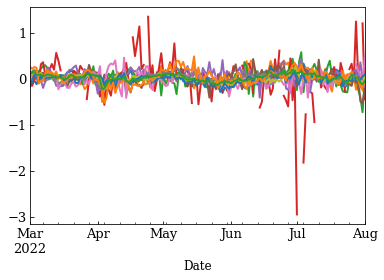

In [53]:
for i in davg_dfs:
    series = i.loc[date_start:date_end]
    series = series["Resonance"]
    series.plot()

In [ ]:
from MFDFA import MFDFA